# Checkpoint 1 — TD3 on Pendulum-v1
Loads `.pkl` statistics saved by `train_pendulum.py` and produces report-ready plots.

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    'figure.facecolor': '#fafafa',
    'axes.facecolor':   '#fafafa',
    'axes.edgecolor':   '#cccccc',
    'axes.grid':        True,
    'grid.alpha':       0.3,
    'axes.spines.top':  False,
    'axes.spines.right':False,
})

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

RESULTS_DIR = './results'
SMOOTH = 50  # smoothing window

## TD3 — effect of exploration noise type

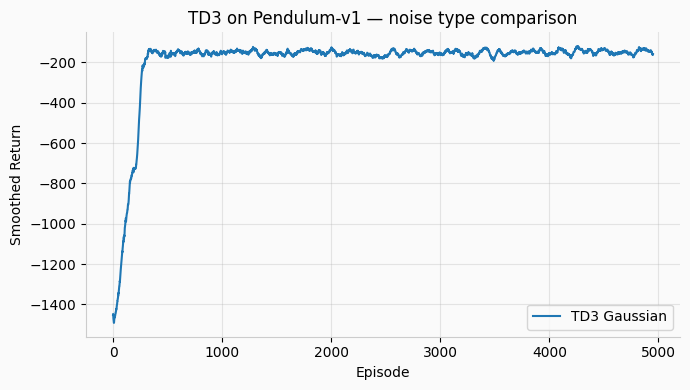

In [7]:
# ---- load TD3 runs ----
# Adjust filenames to match what train_pendulum.py saved
td3_runs = {}
noise_types = ['Gaussian']#, 'OrnsteinU', 'Pink']
expl_noise  = 0.1
seed        = 0   # adjust if you used a different seed

for nt in noise_types:
    fname = os.path.join(RESULTS_DIR,
        f'TD3_results/TD3_Pendulum-v1-noise{nt}-eps{expl_noise}-s{seed}-stat.pkl')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            td3_runs[nt] = pickle.load(f)
    else:
        print(f'Not found: {fname}')

fig, ax = plt.subplots(figsize=(7, 4))
for label, data in td3_runs.items():
    r = running_mean(data['rewards'], SMOOTH)
    ax.plot(r, label=f'TD3 {label}')

ax.set_xlabel('Episode')
ax.set_ylabel('Smoothed Return')
ax.set_title('TD3 on Pendulum-v1 — noise type comparison')
ax.legend()
plt.tight_layout()
plt.savefig('TD3_Pendulum_noise_comparison.pdf')
plt.show()

## TD3 — effect of exploration noise scale

Not found: ./results/TD3_results/TD3_Pendulum-v1-noiseGaussian-eps0.05-sNone-stat.pkl
Not found: ./results/TD3_results/TD3_Pendulum-v1-noiseGaussian-eps0.2-sNone-stat.pkl
Not found: ./results/TD3_results/TD3_Pendulum-v1-noiseGaussian-eps0.5-sNone-stat.pkl


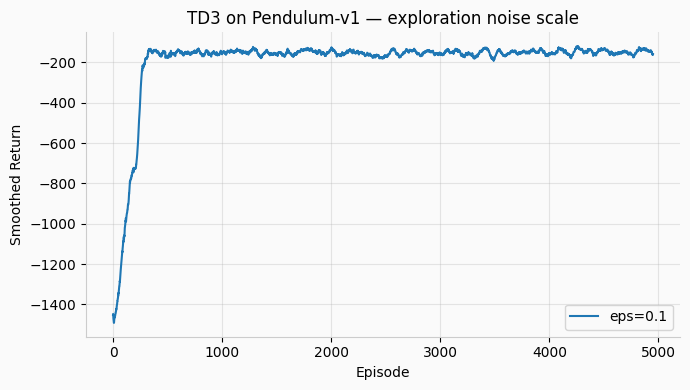

In [10]:
# ---- load TD3 runs with varying eps ----
td3_eps_runs = {}
noise_type = 'Gaussian'
epsilons   = [0.05, 0.1, 0.2, 0.5]
seed       = 0

for eps in epsilons:
    fname = os.path.join(RESULTS_DIR,
        f'TD3_results/TD3_Pendulum-v1-noise{noise_type}-eps{eps}-s{seed}-stat.pkl')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            td3_eps_runs[eps] = pickle.load(f)
    else:
        print(f'Not found: {fname}')

fig, ax = plt.subplots(figsize=(7, 4))
for eps, data in td3_eps_runs.items():
    r = running_mean(data['rewards'], SMOOTH)
    ax.plot(r, label=f'eps={eps}')

ax.set_xlabel('Episode')
ax.set_ylabel('Smoothed Return')
ax.set_title('TD3 on Pendulum-v1 — exploration noise scale')
ax.legend()
plt.tight_layout()
plt.savefig('TD3_Pendulum_eps_comparison.pdf')
plt.show()

## TD3 vs DDPG on Pendulum-v1

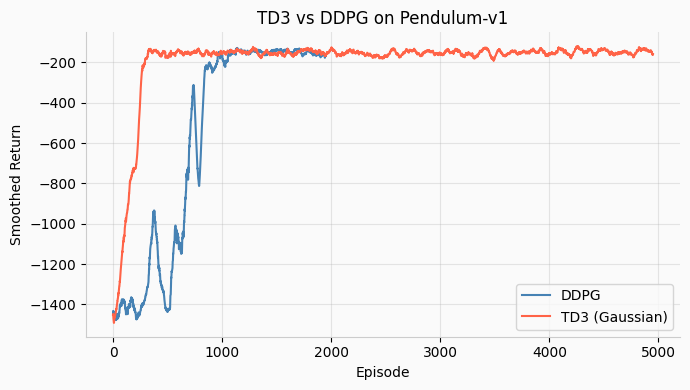

In [11]:
# ---- load DDPG run ----
# Adjust filename to match what DDPG.py saved
ddpg_eps  = 0.1
ddpg_train= 32
ddpg_lr   = 0.0001
ddpg_seed = 999

ddpg_fname = os.path.join(RESULTS_DIR,
    f'DDPG_results/DDPG_Pendulum-v1-eps{ddpg_eps}-t{ddpg_train}-l{ddpg_lr}-s{ddpg_seed}-stat.pkl')

td3_fname = os.path.join(RESULTS_DIR,
    f'TD3_results/TD3_Pendulum-v1-noiseGaussian-eps0.1-s{seed}-stat.pkl')

fig, ax = plt.subplots(figsize=(7, 4))

if os.path.exists(ddpg_fname):
    with open(ddpg_fname, 'rb') as f:
        ddpg_data = pickle.load(f)
    ax.plot(running_mean(ddpg_data['rewards'], SMOOTH), label='DDPG', color='steelblue')
else:
    print(f'DDPG stats not found: {ddpg_fname}')

if os.path.exists(td3_fname):
    with open(td3_fname, 'rb') as f:
        td3_data = pickle.load(f)
    ax.plot(running_mean(td3_data['rewards'], SMOOTH), label='TD3 (Gaussian)', color='tomato')
else:
    print(f'TD3 stats not found: {td3_fname}')

ax.set_xlabel('Episode')
ax.set_ylabel('Smoothed Return')
ax.set_title('TD3 vs DDPG on Pendulum-v1')
ax.legend()
plt.tight_layout()
plt.savefig('TD3_vs_DDPG_Pendulum.pdf')
plt.show()